# Naive Bayse Classifier

In [1]:
import pandas as pd
import hazm
import parsivar as par
import matplotlib as mp
import copy

In [2]:
train_data=pd.read_csv("./Data/divar_train.csv");

## Phase1: Preprocess
1-in this part, the given data is normalized. the methods we can use include:
 - stemming: this method finds the stem of the word regardless of the context, it simply reads the input word by word and tries to reduce the word to a base form.
 
 - lemmatisation: this method reduces the word to its base form considering the context. it takes into account the part of speech of the word and makes decisions accordingly, hence it can be more accurate but is slower.
 
for our preprocess, we used the the "hazm" library for stemming because it was faster than other options and the results were acceptable.
we used stemming over lemmatisation because it was faster.

In [3]:
def normalize(train_data):
    for i in range(len(train_data["description"])):
        tokenizer = par.Tokenizer()
        train_data["description"][i]=tokenizer.tokenize_words(train_data["description"][i])
        train_data["title"][i]=tokenizer.tokenize_words(train_data["title"][i])
        for j in range(len(train_data["description"][i])):   
            stemmer=hazm.Stemmer();
            train_data["description"][i][j]=stemmer.stem(train_data["description"][i][j] );

In [4]:
train_data=pd.read_csv("./Data/divar_train.csv");
normalize(train_data);
train_data

,title,description,categories
0,"[بلبل, خرمایی]","[سه, عدد, بلبل, خرما, سه, ماهه.از, وقت, جوجه, ...",leisure-hobbies
1,"[عینک, اسکی, در, حد]","[عینک, اسک, دبل, لنز, مارک, يو, وكس, در, حد, ن...",leisure-hobbies
2,"[تکیه, سر, تویوتا, پرادو]","[پارچه, ا, سال, و, تمیز.]",vehicles
3,"[مجسمه, کریستال24%]","[مجسمه, دکور, کریستال, بالرین, Rcr24%]",for-the-home
4,"[کیف, و, ساک]","[هر, 2, کاملا, تمیز, هستند]",personal
...,...,...,...
10195,"[ان, هاش, 85]","[نیمه, دو, همه, چ, به, شرط, در, حد, خشک, 260تا...",vehicles
10196,"[405, دوگانه, کارخانه., تمیز]","[فابریک, 4, حلقه, لاستیک, 205, نو, بیمه, یکسال...",vehicles
10197,"[بخاری, گازی, دودکش, دار, پلار]","[بخار, نو, و, بسیار, تمیز, هست, با, مشتر, واقع...",for-the-home
10198,"[نر, کله, برنجی, چتری]","[سلا, به, دلیل, کمبود, جا, واسباب, کش, به, ک, ...",leisure-hobbies


## Phase 2: Making Model

### Bag of Words
the goal is to creat a model to predict the lable of each input in test data. for this we use the bag of words methods where the placement of each word is ignored in our calculations and the sole feature in this model is the frequency of each word. we use the following formula:
$$p(c|x)=\frac{p(x|c)p(c)}{p(x)}$$
2-in this formula we have:
 - posterior probablity(p(c|x)): the aim is to calculate this probality to find the best possible class for input, it is the probabilty of $class=c$ if its title and description contains words $X=[x_1,x_2,...x_n]$].
 
 - likelihood(p(x|c)): this is the probability of seeing word x in class c, and is calculated as this:
 
 $$\frac{number\;of\;times\;word\;x\;has\;appeared\;in\;class\;c}{total\;words\;seen\;in\;class\;c}$$
 
 
 - prior class probabilty(p(c)): this is the probablity of class c happening in general, which is usually determined by  domain experts. in this case, we can assume it is equal to:
 $$\frac{number\;of\;times\;class\;c\;has\;appeared\;in\;data\;set}{size\;of\;data\;set}$$
 
 - evidence (p(x)): the probablity of  word x appearing, which is equal to:
 
 $$\frac{number\;of\;times\;word\;x\;has\;appeared\;in\;dataset}{total\;words\;seen\;in\;dataset}$$
 
    

### Code for Making a Model

In [5]:
categories=train_data["categories"].unique()
total_words={"vehicles":0, "leisure-hobbies":0, "for-the-home":0, "personal":0, "electronic-devices":0,"businesses":0}

def naive_bayse_model(data):
    word_dict={"vehicles":{}, "leisure-hobbies":{}, "for-the-home":{}, "personal":{}, "electronic-devices":{},"businesses":{}}
    for i in range(len(data)):
        for word in data["description"][i]:
            if(word in word_dict[data["categories"][i]]):
                word_dict[data["categories"][i]][word]+=1;
            else:
                word_dict[data["categories"][i]][word]=1;
            total_words[data["categories"][i]]+=1;
        for word in data["title"][i]:
            if(word in word_dict[data["categories"][i]]):
                word_dict[data["categories"][i]][word]+=1;
            else:
                word_dict[data["categories"][i]][word]=1;
            total_words[data["categories"][i]]+=1;
    return word_dict;
            

In [6]:
model=naive_bayse_model(train_data);

### Naive Bayes Code

In [7]:
def naive_bayes(test,model):
    for i in range(len(test)):
        cur_cat=0;
        p_max=0;
        for cat in categories:
            p_all=1;
            for word in test["description"][i]:
                if word in model[cat]:
                    p=(model[cat][word])/total_words[cat];
                    p_all=p*p_all;
                else:
                    p_all*=0.00000000001;
            for word in test["title"][i]:
                if word in model[cat]:
                    p=(model[cat][word])/total_words[cat];
                    p_all=p*p_all;
                else:
                    p_all*=0;
                            
            if p_all>=p_max:
                p_max=p_all;
                cur_cat=cat;
        test["categories"][i]=cur_cat;
    return test;

## Bigrams
sometimes, a single word may have different meanings in different context. for example take these two sentences:

1-شیر آب باز است.

2-شیر غرش می‌کند.

the word شیر has two different meanings in these two sentences, and this would be lost in unigrams we used in previous part. however, if we take two words each time, then we have these conbinations:

1-"شیر غرش"

2-"شیر آب"

which can show the difference in meaning to some extent. in this example bigram worked fine. but sometimes we may need more words (n-gram) to determine the meaning.

## Additive Smoothing

4-this problem happens because if a word is only in one class, if we call that class $c$ and that word $x_1$, according to naive bayes formula, for every class $c'$ such that $c'\neq c$ we have:
$$p(c'|X)=p(c'|x_1)\times...\times p(c'|x_n) \rightarrow  p(c'|x_1)=\frac{p(x_1|c')p(c')}{p(x_1)}=0\rightarrow p(c'|X)=0$$
so for every other class, $p(c'|X)=0$ and class $c$ will always be choosen.

5-one solution for this problem is additive smoothing. In this method, p(c|x) is computed as follows:

$$p(c|x)=\frac{number\;of\;x\;in\;class\;c+ \alpha}{number\;of\;x\;+k\times \alpha}$$

where k is the number of features (here it is 1) and $\alpha$ is the smoothing parameter.
This way, in case of no occurrence of x, p(c|x) would not be 0, so the problem above wont occur.

In [8]:
def smooth_naive_bayes(test,model,alpha):
    for i in range(len(test)):
        cur_cat=0;
        p_max=0;
        for cat in categories:
            p_all=1;
            for word in test["description"][i]:
                if word in model[cat]:
                    p=(model[cat][word]+alpha)/(total_words[cat]+alpha);
                    p_all=p*p_all;
                else:
                    p_all*=(alpha)/(total_words[cat]+alpha);
            for word in test["title"][i]:
                if word in model[cat]:
                    p=(model[cat][word]+alpha)/(total_words[cat]+alpha);
                    p_all=p*p_all;
                else:
                    p_all*=(alpha)/(total_words[cat]+alpha);
                            
            if p_all>=p_max:
                p_max=p_all;
                cur_cat=cat;
        test["categories"][i]=cur_cat;
    return test;

## Model Graph
bellow,the most common words of each class is shown, we can see that the most common words are the same in these classes but removing them did not improve the result, so we kept them.

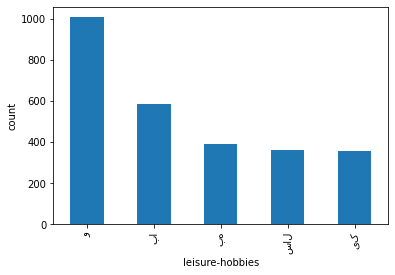

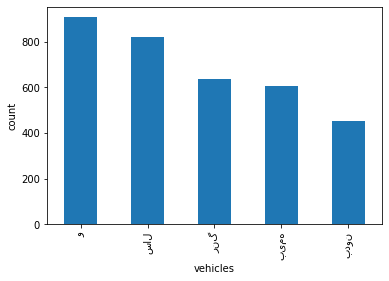

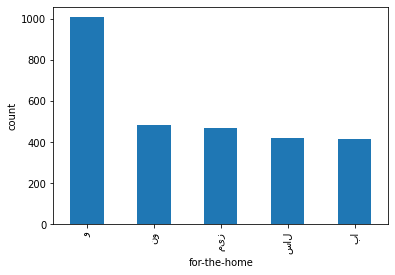

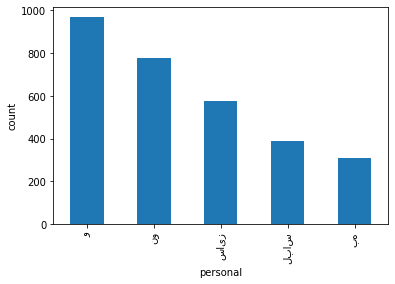

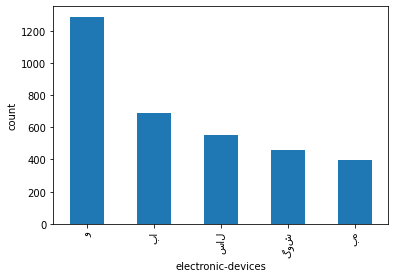

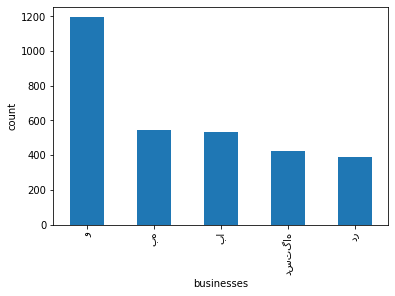

<Figure size 432x288 with 0 Axes>

In [9]:
model2=pd.DataFrame(model);
model2

for col in train_data["categories"].unique():
    temp=model2.nlargest(5, [col]);
    temp[col].plot.bar();
    mp.pyplot.xlabel(col);
    mp.pyplot.ylabel("count");
    mp.pyplot.show();
    mp.pyplot.clf();

## Phase3: Evaluate
we use these methods to evaluate our model:

$$Accuracy=\frac{correct\;detected}{total}$$

$$Precision=\frac{correct\;detected\;class}{total\;detected\;class}$$

$$Recall=\frac{correct\;detected\;class}{total\;class}$$

$$F1=2\times\frac{Precision\times Recall}{Precision+ Recall}$$

7-Why do we need both Precision and Recall?

imagine these two cases:

  - we design our model to always return "personal".if we give it a data set of size 100000 with just 1 instance of class "personal",with Recall score, our model will get an excelent score of 1 , because it has labled all of "personal" class correctly, however, our model preforms poorly because it has too many wrong detections and can never detect a class that is not "personal".


  - imagine if the test has 500 members of class "personal" and our model predicts 5 of these to belong to class "personal" and does not make a mistake in these 5. then we get precision=1 for class "personal" because all of the predictions were correct, however we get low recall score because our model has just detected 5 of 500 instances of class "personal" and in general had a poor result.
  
8- F1 uses the "Harmonic Mean" of Recall and Precision. Harmonic mean increases the effect of small values and decreases the effect of large ones.F1 uses harmonic mean because harmonic mean favors balance between Recall and Precision.

9- Since this classification problem has multiple classes, We evaluate overall preformance of our model using following  methods:
 - Macro Avg:this is the normal mean of data, for example Macro F1 would be:
 $$\frac{F1_{c1}+F1_{c2}+...+F1_{c6}}{6}$$
 
 - Micro Avg:this is equal to accuracy:
 $$Micro Avg=\frac{correct\;detected}{total}$$
 
 - Weighted Avg: this is the weighted mean of data, each data has a weight equal to number of times it has appeared in the test

### Analyze Function

In [10]:
def analyse(out,expected, cat,table):
    tp=0
    tn=0
    fp=0
    fn=0
    for i in range(len(out)):
        if out["categories"][i]==cat and expected["categories"][i]==cat:
            tp+=1
        elif out["categories"][i]==cat and expected["categories"][i]!=cat:
            fp+=1
        elif out["categories"][i]!=cat and expected["categories"][i]==cat:
            fn+=1
        elif out["categories"][i]!=cat and expected["categories"][i]!=cat:
            tn+=1
    recall=tp/(tp+fp)
    precision=tp/(tp+fn)
    f1=2*((recall*precision)/(recall+precision))
    table[cat]["Recall"]=recall
    table[cat]["Precision"]=precision
    table[cat]["F1"]=f1

In [11]:
def complete_analysis(output,test_data):
    
    #Creating The Table
    cols=list(copy.deepcopy(categories))
    cols.append("All Classes")
    table=pd.DataFrame(index=pd.Index(['Precision', 'Recall', 'F1', 'Accuracy', 'Macro Avg', 'Micro Avg', 'Weighted Avg']),columns=pd.Index(cols))
    
    #Accuracy and Micro Avg
    acc=output["categories"]==test_data["categories"]
    o=acc.value_counts(normalize=True).rename_axis('value').reset_index(name='percent')
    table["All Classes"]["Accuracy"]=o["percent"][0]
    table["All Classes"]["Micro Avg"]=o["percent"][0]

    #Categories data
    for cat in categories:
        analyse(output,test_data,cat,table)
    
    #Macro Avg
    summ=0
    for cat in categories:
        summ+=table[cat]['F1']
    table['All Classes']['Macro Avg']=summ/6

    #Weighted Avg
    val_count=output["categories"].value_counts(normalize=True).rename_axis('value').reset_index(name='percent')
    summ=0
    for i in range(len(categories)):
        summ+=table[categories[i]]['F1']*val_count["percent"][i]
    table['All Classes']['Weighted Avg']=summ
    
    #Final Table
    display(table)

### Loading Test Data
10 - in this part we test our model with test data

In [12]:
test_data=pd.read_csv("./Data/divar_test.csv");
normalize(test_data);

### Normal Naive Bayes Result (without additive smoothing)

In [13]:
output=naive_bayes(copy.deepcopy(test_data),model);
complete_analysis(output,test_data)

,leisure-hobbies,vehicles,for-the-home,personal,electronic-devices,businesses,All Classes
Precision,0.486667,0.48,0.59,0.54,0.39,0.876667,NaN
Recall,0.884848,0.941176,0.804545,0.895028,0.928571,0.275393,NaN
F1,0.627957,0.635762,0.680769,0.673597,0.549296,0.419124,NaN
Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,0.560556
Macro Avg,NaN,NaN,NaN,NaN,NaN,NaN,0.597751
Micro Avg,NaN,NaN,NaN,NaN,NaN,NaN,0.560556
Weighted Avg,NaN,NaN,NaN,NaN,NaN,NaN,0.617101


### Naive Bayes With Additive Smoothing Result

In [14]:
smooth_output=smooth_naive_bayes(copy.deepcopy(test_data),model,0.1);
complete_analysis(smooth_output,test_data)

,leisure-hobbies,vehicles,for-the-home,personal,electronic-devices,businesses,All Classes
Precision,0.85,0.903333,0.863333,0.893333,0.886667,0.793333,NaN
Recall,0.917266,0.940972,0.784848,0.875817,0.926829,0.765273,NaN
F1,0.882353,0.921769,0.822222,0.884488,0.906303,0.779051,NaN
Accuracy,NaN,NaN,NaN,NaN,NaN,NaN,0.865
Macro Avg,NaN,NaN,NaN,NaN,NaN,NaN,0.866031
Micro Avg,NaN,NaN,NaN,NaN,NaN,NaN,0.865
Weighted Avg,NaN,NaN,NaN,NaN,NaN,NaN,0.867147


### Result Analysis
11-We can see that adding additive smoothing improved the results. it is because of the existance of new words in test cases and the problems it causes for normal naive bayes.

### Analyzing Wrong Answers

In [15]:
test_data=pd.read_csv("./Data/divar_test.csv");
j=1
for i in range(len(smooth_output)):
    if smooth_output["categories"][i]!=test_data["categories"][i]:
        print("wrong answer ",j," :","\ntitle: " ,test_data["title"][i]," \ndescription: ",test_data["description"][i])
        print("actual class:" ,test_data["categories"][i],"\ndetected class: ",smooth_output["categories"][i],"\n")
        j+=1;
    if j>5:
        break;

wrong answer  1  : 
title:  سیپوراکس  
description:  سیپوراکس میکرو مک جی بی ال و سرامیک سرا ، کاهنده نیترات و نیتریت اکواریوم ، درجه یک
actual class: leisure-hobbies 
detected class:  businesses 

wrong answer  2  : 
title:  موتور تزیینی  
description:  از جنس اهن کار دست عرضه به صورت عمده و تکی
actual class: for-the-home 
detected class:  businesses 

wrong answer  3  : 
title:  90عدد بشقاب پیتزا تک نفره قیمت هرعدد 4000  
description:  بشقاب پیتزا یک نفره عددی 4000 باتشکراز دیوار.
actual class: businesses 
detected class:  for-the-home 

wrong answer  4  : 
title:  پیکور17کیلوییNEK  
description:  پیکور 17 کیلوییNEK
باهاش خیلی کم کارکردم
مخصوص تخریب،سوراخکاری برای تاسیسات،مثل لوله کشی آب ،گاز،هواکش،ودودکش
قیمتش خیلی خوبه
باتشکر ازدیوار...
actual class: businesses 
detected class:  leisure-hobbies 

wrong answer  5  : 
title:  اچارشلاقی HEYCOالمان  
description:  اصل المان 
سایز ۱/۵
بسیار مقاوم
actual class: businesses 
detected class:  personal 



analyzing the above answers, these are the possible reasons of getting wrong answers:
 - new words: wrong answer may be due to new words in test_data. because when we have new words, the algorithm cannot use that word to decide. One solution would be having more data as training set.
 - unclear class: in some cases, there may be differen possible classes for the data, and different people may give different answers, so the classification based on words would be insufficient, in this case we may need to change our method.